# **Chapter 1**

## Basic Modeling in scikit-learn
> Before we can validate models, we need an understanding of how to create and work with them. This chapter provides an introduction to running regression and classification models in scikit-learn. We will use this model building foundation throughout the remaining chapters. This is the Summary of lecture "Model Validation in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: 

In [520]:
import pandas as pd
import numpy as np

## Introduction to model validation
- Model validation
    - Ensuring your model performs as expected on new data
    - Testing model performance on holdout datasets
    - Selecting the best model, parameters, and accuracy metrics
    - Achieving the best accuracy for the given data
    

### Seen vs. unseen data
Model's tend to have higher accuracy on observations they have seen before. In the candy dataset, predicting the popularity of Skittles will likely have higher accuracy than predicting the popularity of Andes Mints; Skittles is in the dataset, and Andes Mints is not.

You've built a model based on 50 candies using the dataset `X_train` and need to report how accurate the model is at predicting the popularity of the 50 candies the model was built on, and the 35 candies (`X_test`) it has never seen. You will use the mean absolute error, `mae()`, as the accuracy metric.

In [521]:
candy = pd.read_csv('candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [522]:
X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

In [523]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116
81,0,1,0,0,0,0,1,0,0,0.093,0.116
82,0,1,0,0,0,0,0,0,1,0.313,0.313
83,0,0,1,0,0,0,1,0,0,0.186,0.267


In [524]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = RandomForestRegressor(n_estimators=50)

In [525]:
# The model is fit using X_train and y_train
model.fit(X_train, y_train)
 
# Create vectors of predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
 
# Train/Test Errors
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)
 
# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

Model error on seen data: 3.47.
Model error on unseen data: 10.02.


When models perform differently on training and testing data, you should look to model validation to ensure you have the best performing model. 

## Regression models
- Random forest parameters
    - `n_estimators`: the number of trees in the forest
    - `max_depth`: the maximum depth of the trees
    - `random_state`: random seed

### Set parameters and fit a model
Predictive tasks fall into one of two categories: regression or classification. In the candy dataset, the outcome is a continuous variable describing how often the candy was chosen over another candy in a series of 1-on-1 match-ups. To predict this value (the win-percentage), you will use a **regression** model.



In [526]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [527]:
# Set the number of trees
rfr.n_estimators = 100

# Add a maximum depth
rfr.max_depth = 6

# Set the random date
rfr.random_state = 1111

# Fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=1111)

You have updated parameters after the model was initialized. This approach is helpful when you need to update parameters. Before making predictions, let's see which candy characteristics were most important to the model.

### Feature importances
Although some candy attributes, such as chocolate, may be extremely popular, it doesn't mean they will be important to model prediction. After a random forest model has been fit, you can review the model's attribute, `.feature_importances_`, to see which variables had the biggest impact. You can check how important each variable was in the model by looping over the feature importance array using `enumerate()`.



In [528]:
# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
    # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

chocolate: 0.46
fruity: 0.05
caramel: 0.00
peanutyalmondy: 0.08
nougat: 0.00
crispedricewafer: 0.01
hard: 0.02
bar: 0.00
pluribus: 0.01
sugarpercent: 0.16
pricepercent: 0.20


No surprise here - chocolate is the most important variable. `.feature_importances_` is a great way to see which variables were important to your random forest model.

## Classification models

### Classification predictions
In model validation, it is often important to know more about the predictions than just the final classification. When predicting who will win a game, most people are also interested in how likely it is a team will win.

| Probability      | Prediction | Meaning |
| ----------- | ----------- | ---------- |
| 0 < .5      | 0       | Team Loses |
| .5 < 1   | 1        | Team Wins |

In this exercise, you look at the methods, `.predict()` and `.predict_proba()` using the `tic_tac_toe` dataset. The first method will give a prediction of whether Player One will win the game, and the second method will provide the probability of Player One winning.

In [529]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [530]:
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)
X = tic_tac_toe.drop('Class', axis=1)
X = pd.get_dummies(X)

In [531]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
rfc = RandomForestClassifier()

In [532]:
# Fit the rfc model
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print out count of binary predictions
print(pd.Series(classification_predictions).value_counts())

# Print the first value from probability_predictions
print('The first predicted probabilities are: {}'.format(probability_predictions[0]))

1    578
0    189
Name: count, dtype: int64
The first predicted probabilities are: [0.4 0.6]


You can see there were 563 observations where Player One was predicted to win the Tic-Tac-Toe game. Also, note that the `predicted_probabilities` array contains lists with only two values because you only have two possible responses (win or lose). Remember these two methods, as you will use them a lot throughout this course.

### Reusing model parameters
Replicating model performance is vital in model validation. Replication is also important when sharing models with co-workers, reusing models on new data or asking questions on a website such as [Stack Overflow](https://stackoverflow.com/). You might use such a site to ask other coders about model errors, output, or performance. The best way to do this is to replicate your work by reusing model parameters.

In this exercise, you use various methods to recall which parameters were used in a model.




In [533]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Print the classification model
print(rfc)

# Print the classification model's random state parameter
print('The random state is: {}'.format(rfc.random_state))

# Print all parameters
print('Printing the parameters dictionary: {}'.format(rfc.get_params()))

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1111)
The random state is: 1111
Printing the parameters dictionary: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


Recalling which parameters were used will be helpful going forward. Model validation and performance rely heavily on which parameters were used, and there is no way to replicate a model without keeping track of the parameters used!

### Random forest classifier
This exercise reviews the four modeling steps discussed throughout this chapter using a random forest classification model. You will:

1. Create a random forest classification model.
2. Fit the model using the tic_tac_toe dataset.
3. Make predictions on whether Player One will win (1) or lose (0) the current game.
4. Finally, you will evaluate the overall accuracy of the model.

In [534]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1111)

# Fit rfc using X_train and y_train
rfc.fit(X_train, y_train)

# Create predictions on X_test
predictions = rfc.predict(X_test)
print(predictions[0:5])

# Print model accuracy using score() and the testing data
print(rfc.score(X_test, y_test))

[1 1 0 1 0]
0.7926988265971316


That's all the steps! Notice the first five predictions were all 1, indicating that Player One is predicted to win all five of those games. You also see the model accuracy was only 82%.

# **Chapter 2**

## Validation Basics
> This chapter focuses on the basics of model validation. From splitting data into training, validation, and testing datasets, to creating an understanding of the bias-variance tradeoff, we build the foundation for the techniques of K-Fold and Leave-One-Out validation practiced in chapter three. This is the Summary of lecture "Model Validation in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/train_test_score.png

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Creating train,test, and validation datasets
- Traditional train/test split
    - Seen data (used for training)
    - Unseen data (unavailable for training)
![holdout](image/holdout.png)

### Create one holdout set
Your boss has asked you to create a simple random forest model on the `tic_tac_toe` dataset. She doesn't want you to spend much time selecting parameters; rather she wants to know how well the model will perform on future data. For future Tic-Tac-Toe games, it would be nice to know if your model can predict which player will win.

In [536]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [537]:
from sklearn.model_selection import train_test_split

# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

### Create two holdout sets
You recently created a simple random forest model to predict Tic-Tac-Toe game wins for your boss, and at her request, you did not do any parameter tuning. Unfortunately, the overall model accuracy was too low for her standards. This time around, she has asked you to focus on model performance.

Before you start testing different models and parameter sets, you will need to split the data into training, validation, and testing datasets. Remember that after splitting the data into training and testing datasets, the validation dataset is created by splitting the training dataset.

In [538]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, 
                                                  test_size=0.25, random_state=1111)

You now have training, validation, and testing datasets, but do you know when you need both validation and testing datasets?

## Accuracy metrics: regression models
- Mean absolute error (MAE)
$$ \text{MAE} = \frac{\sum_{i=1}^{n} \vert y_i - \hat{y_i} \vert}{n} $$
    - Simplest and most intuitive metric
    - Treats all points equally
    - Not sensitive to outliers
- Mean squared error (MSE)
$$ \text{MSE} = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n} $$
    - Most widely used regression metric
    - Allows outlier errors to contribute more to the overall error
    - Random family road trips could lead to large errors in predictions
- MAE vs. MSE
    - Accuracy metrics are always application apecific
    - MAE and MSE error terms are in different units and should not be compared

### Mean absolute error
Communicating modeling results can be difficult. However, most clients understand that on average, a predictive model was off by some number. This makes explaining the mean absolute error easy. For example, when predicting the number of wins for a basketball team, if you predict 42, and they end up with 40, you can easily explain that the error was two wins.

In this exercise, you are interviewing for a new position and are provided with two arrays. `y_test`, the true number of wins for all 30 NBA teams in 2017 and `predictions`, which contains a prediction for each team. To test your understanding, you are asked to both manually calculate the MAE and use `sklearn`.


In [539]:
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])

predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])

In [540]:
from sklearn.metrics import mean_absolute_error

# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

With a manual calculation, the error is 5.9
Using scikit-learn, the error is 5.9


These predictions were about six wins off on average. This isn't too bad considering NBA teams play 82 games a year. Let's see how these errors would look if you used the mean squared error instead.

### Mean squared error
Let's focus on the 2017 NBA predictions again. Every year, there are at least a couple of NBA teams that win way more games than expected. If you use the MAE, this accuracy metric does not reflect the bad predictions as much as if you use the MSE. Squaring the large errors from bad predictions will make the accuracy look worse.

In this example, NBA executives want to better predict team wins. You will use the mean squared error to calculate the prediction error. The actual wins are loaded as `y_test` and the `predictions` as predictions.

In [541]:
from sklearn.metrics import mean_squared_error

n = len(predictions)
# Finish the manual calculation of the MSE
mse_one = sum((y_test - predictions) ** 2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 49.1
Using scikit-learn, the error is 49.1


If you run any additional models, you will try to beat an MSE of 49.1, which is the average squared error of using your model. Although the MSE is not as interpretable as the MAE, it will help us select a model that has fewer 'large' errors.

### Performance on data subsets
In professional basketball, there are two conferences, the East and the West. Coaches and fans often only care about how teams in their own conference will do this year.

You have been working on an NBA prediction model and would like to determine if the predictions were better for the East or West conference. You added a third array to your data called `labels`, which contains an "E" for the East teams, and a "W" for the West. `y_test` and `predictions` have again been loaded for your use.

In [542]:
labels= np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W'])

In [543]:
from sklearn.metrics import mean_absolute_error as mae

# Find the East conference teams
east_teams = labels == 'E'

# Create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

west_teams = labels == 'W'
true_west = y_test[west_teams]
preds_west = predictions[west_teams]

# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mae(true_east, preds_east)))

# Print the west accuracy
print('The MAE for West teams is {}'.format(mae(true_west, preds_west)))

The MAE for East teams is 6.733333333333333
The MAE for West teams is 5.066666666666666


 It looks like the Western conference predictions were about two games better on average. Over the past few seasons, the Western teams have generally won the same number of games as the experts have predicted. Teams in the East are just not as predictable as those in the West.

## Classification metrics
- Types:
    - Precision
    - Recall (also called sensitivity)
    - Accuracy
    - Specificity
    - F1-score and its variations
- Confusion Matrix
    - True Positive: Predict/Actual are both 1
    - True Negative: Predict/Actual are both 0
    - False Positive: Predicted 1, actual 0
    - False Negative: Predicted 0, actual 1

### Confusion matrices
Confusion matrices are a great way to start exploring your model's accuracy. They provide the values needed to calculate a wide range of metrics, including sensitivity, specificity, and the F1-score.

You have built a classification model to predict if a person has a broken arm based on an X-ray image. On the testing set, you have the following confusion matrix:

|        |  Prediction: 0 | Prediction: 1 |
| ------ | -------------- | ------------- |
| Actual: 0 | 324 (TN) | 15 (FP) |
| Actual: 1 | 123 (FN) | 491(TP) |

In [544]:
# Calculate and print the accuracy
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision
precision = (491) / (15 + 491)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall
recall = (491) / (123 + 491)
print("The recall is {0: 0.2f}".format(recall))

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80


In this case, a true positive is a picture of an actual broken arm that was also predicted to be broken. Doctors are okay with a few additional false positives (predicted broken, not actually broken), as long as you don't miss anyone who needs immediate medical attention.

### Confusion matrices, again
Creating a confusion matrix in Python is simple. The biggest challenge will be making sure you understand the orientation of the matrix. This exercise makes sure you understand the `sklearn` implementation of confusion matrices. Here, you have created a random forest model using the `tic_tac_toe` dataset `rfc` to predict outcomes of 0 (loss) or 1 (a win) for Player One.

Note: If you read about confusion matrices on another website or for another programming language, the values might be reversed.

In [545]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

In [546]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=1111)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1111)

In [547]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))

[[28  2]
 [ 0 66]]
The number of true positives is: 66


Row 1, column 1 represents the number of actual 1s that were predicted 1s (the true positives). Always make sure you understand the orientation of the confusion matrix before you start using it!

### Precision vs. recall
The accuracy metrics you use to evaluate your model should always be based on the specific application. For this example, let's assume you are a really sore loser when it comes to playing Tic-Tac-Toe, but only when you are certain that you are going to win.

Choose the most appropriate accuracy metric, either precision or recall, to complete this example. But remember, if you think you are going to win, you better win!

In [548]:
from sklearn.metrics import precision_score

test_predictions = rfc.predict(X_test)

# Create precision or recall score based on the metric you imported
score = precision_score(y_test, test_predictions)

# Print the final result
print("The precision value is {0:.2f}".format(score))

The precision value is 0.97


In [549]:
from sklearn.metrics import precision_score, recall_score

test_predictions = rfc.predict(X_test)

# Create precision score based on the metric
p_score = precision_score(y_test, test_predictions)
r_score = recall_score(y_test, test_predictions)

# Print the final result
print('The precision value is {0:.2f}, The recall value is {1:.2f}'.format(p_score, r_score))

The precision value is 0.97, The recall value is 1.00


## The bias-variance tradeoff
- Variance
    - Following the training data too closely
    - Fails to generalize to the test data
    - Low training error but high test error
    - Occurs when models are overfit and have high complexity
    - High variance makes over-fitting
- Bias
    - Failing to find the relationship between the data and the response
    - High training/test error
    - Occurs when models are underfit
    - High bias makes under-fitting

### Error due to under/over-fitting
The candy dataset is prime for overfitting. With only 85 observations, if you use 20% for the testing dataset, you are losing a lot of vital data that could be used for modeling. Imagine the scenario where most of the chocolate candies ended up in the training data and very few in the holdout sample. Our model might only see that chocolate is a vital factor, but fail to find that other attributes are also important. In this exercise, you'll explore how using too many features (columns) in a random forest model can lead to overfitting.



In [550]:
candy = pd.read_csv('candy-data.csv')

X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [551]:
from sklearn.ensemble import RandomForestRegressor

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=2)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.90
The testing error is 9.15


In [552]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=11)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.59
The testing error is 10.00


In [553]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=4)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.60
The testing error is 8.79


### Am I underfitting?
You are creating a random forest model to predict if you will win a future game of Tic-Tac-Toe. Using the `tic_tac_toe` dataset, you have created training and testing datasets, `X_train`, `X_test`, `y_train`, and `y_test`.

You have decided to create a bunch of random forest models with varying amounts of trees (1, 2, 3, 4, 5, 10, 20, and 50). The more trees you use, the longer your random forest model will take to run. However, if you don't use enough trees, you risk underfitting. You have created a for loop to test your model at the different number of trees.

In [554]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [555]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    
    # Create predictions for the X_train and X_test datasets
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    
    # Append the accuracy score for the test and train predictions
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))
    
# Print the train and test scores
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))

The training scores were: [0.94, 0.93, 0.98, 0.97, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.83, 0.79, 0.89, 0.91, 0.91, 0.93, 0.97, 0.98]


Notice that with only one tree, both the train and test scores are low. As you add more trees, both errors improve. Even at 50 trees, this still might not be enough. Every time you use more trees, you achieve higher accuracy. At some point though, more trees increase training time, but do not decrease testing error.

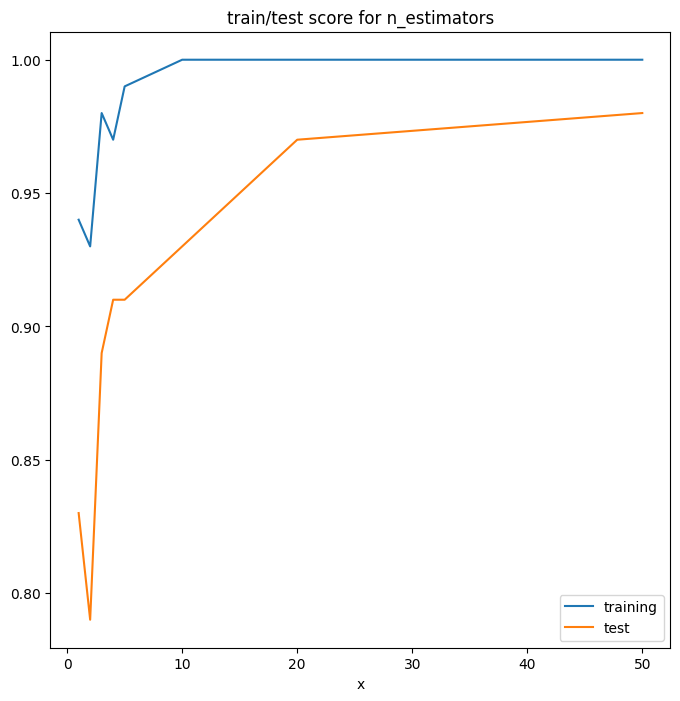

In [556]:
x = [1, 2, 3, 4, 5, 10, 20, 50]
tmp = pd.DataFrame({'x':x, 'training':train_scores, 'test':test_scores})
tmp.set_index('x', inplace=True)
tmp.plot(title='train/test score for n_estimators');

# **Chapter 3**

## Cross Validation
> Holdout sets are a great start to model validation. However, using a single train and test set if often not enough. Cross-validation is considered the gold standard when it comes to validating model performance and is almost always used when tuning model hyper-parameters. This chapter focuses on performing cross-validation to validate model performance. This is the Summary of lecture "Model Validation in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/loocv.png

In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## The problems with holdout sets

### Two samples
After building several classification models based on the `tic_tac_toe` dataset, you realize that some models do not generalize as well as others. You have created training and testing splits just as you have been taught, so you are curious why your validation process is not working.

After trying a different training, test split, you noticed differing accuracies for your machine learning model. Before getting too frustrated with the varying results, you have decided to see what else could be going on.

In [558]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [559]:
# Create two different samples of 200 observations
sample1 = tic_tac_toe.sample(n=200, random_state=1111)
sample2 = tic_tac_toe.sample(n=200, random_state=1171)

# Print the number of common observations
print(len([index for index in sample1.index if index in sample2.index]))

# Print the number of observations in the Class column for both samples
print(sample1['Class'].value_counts())
print(sample2['Class'].value_counts())

40
Class
positive    134
negative     66
Name: count, dtype: int64
Class
positive    123
negative     77
Name: count, dtype: int64


Notice that there are a varying number of positive observations for both sample test sets. Sometimes creating a single test holdout sample is not enough to achieve the high levels of model validation you want. You need to use something more robust.

## Cross-validation

### scikit-learn's KFold()
You just finished running a colleagues code that creates a random forest model and calculates an out-of-sample accuracy. You noticed that your colleague's code did not have a random state, and the errors you found were completely different than the errors your colleague reported.

To get a better estimate for how accurate this random forest model will be on new data, you have decided to generate some indices to use for KFold cross-validation.

In [560]:
candy = pd.read_csv('candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [561]:
X = candy.drop(['competitorname', 'winpercent'], axis=1).to_numpy()
y = candy['winpercent'].to_numpy()

In [562]:
from sklearn.model_selection import KFold

# Use KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: %s" % len(train_index))
    print("Number of validation indices: %s" % len(val_index))

Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17
Number of training indices: 68
Number of validation indices: 17


This dataset has 85 rows. You have created five splits - each containing 68 training and 17 validation indices. You can use these indices to complete 5-fold cross-validation.

### Using KFold indices
You have already created `splits`, which contains indices for the candy-data dataset to complete 5-fold cross-validation. To get a better estimate for how well a colleague's random forest model will perform on a new data, you want to run this model on the five different training and validation indices you just created.

In this exercise, you will use these indices to check the accuracy of this model using the five different splits. A for loop has been provided to assist with this process.

In [563]:
# Create splits
splits = kf.split(X)

In [564]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

# Access the training and validation indices of splits
for train_index, val_index in splits:
    # Setup the training and validation data
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    
    # Fit the random forest model
    rfc.fit(X_train, y_train)
    
    # Make predictions, and print the accuracy
    predictions = rfc.predict(X_val)
    print("Split accuracy: " + str(mean_squared_error(y_val, predictions)))

Split accuracy: 150.99298148707666
Split accuracy: 171.22206240542593
Split accuracy: 131.72569156195593
Split accuracy: 80.61940183841385
Split accuracy: 221.63020627476214


`KFold()` is a great method for accessing individual indices when completing cross-validation. One drawback is needing a for loop to work through the indices though.

## sklearn's cross_val_score()

### scikit-learn's methods
You have decided to build a regression model to predict the number of new employees your company will successfully hire next month. You open up a new Python script to get started, but you quickly realize that sklearn has a lot of different modules. Let's make sure you understand the names of the modules, the methods, and which module contains which method.

Follow the instructions below to load in all of the necessary methods for completing cross-validation using sklearn. You will use modules:

- metrics
- model_selection
- ensemble

In [565]:
# Import cross_val_score from model_selection module
from sklearn.model_selection import cross_val_score

# Instruction 1: Load the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
from sklearn.metrics import mean_squared_error

# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import make_scorer


### Implement cross_val_score()
Your company has created several new candies to sell, but they are not sure if they should release all five of them. To predict the popularity of these new candies, you have been asked to build a regression model using the candy dataset. Remember that the response value is a head-to-head win-percentage against other candies.

Before you begin trying different regression models, you have decided to run cross-validation on a simple random forest model to get a baseline error to compare with any future results.

In [566]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)
mse = make_scorer(mean_squared_error)

# Setup cross_val_score
cv = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10, scoring=mse)

# Print the mean error
print(cv.mean())

131.30323056938693


You now have a baseline score to build on. If you decide to build additional models or try new techniques, you should try to get an error lower than 155.56. Lower errors indicate that your popularity predictions are improving.

## Leave-one-out-cross-validation (LOOCV)
- LOOCV
- When to use LOOCV?
    - The amount of training data is limited
    - You want the absolute best error estimate for new data
- Be cautious when:
    - Computation resources are limited
    - You have a lot of data
    - You have a lot of parameters to test

### Leave-one-out-cross-validation
Let's assume your favorite candy is not in the candy dataset, and that you are interested in the popularity of this candy. Using 5-fold cross-validation will train on only 80% of the data at a time. The candy dataset only has 85 rows though, and leaving out 20% of the data could hinder our model. However, using leave-one-out-cross-validation allows us to make the most out of our limited dataset and will give you the best estimate for your favorite candy's popularity!



In [581]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create scorer
mae_scorer = make_scorer(mean_absolute_error)

# Instantiate the RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=15, random_state=1111)

# Define cv for LOOCV
cv = X.shape[0]  # Number of samples in X

# Implement LOOCV
scores = cross_val_score(rfr, X, y, cv=cv, scoring=mae_scorer)

# Print the mean and standard deviation of errors
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))


The mean of the errors is: 0.07014613778705638.
The standard deviation of the errors is: 0.12079897928668414.


You have come along way with model validation techniques. The final chapter will wrap up model validation by discussing how to select the best model and give an introduction to parameter tuning.

# **Chapter 4**

## Selecting the best model with Hyperparameter tuning.
> The first three chapters focused on model validation techniques. In chapter 4 we apply these techniques, specifically cross-validation, while learning about hyperparameter tuning. After all, model validation makes tuning possible and helps us select the overall best model. This is the Summary of lecture "Model Validation in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: 

In [568]:
import pandas as pd
import numpy as np

## Introduction to hyperparameter tuning
- Model Parameters
    - Learned or estimated from the data
    - The result of fitting a model
    - Used when making future predictions
    - Not manually set
- Model Hyperparameters
    - Manually set before the training occurs
    - Specify how the training is supposed to happen
- Hyperparameter tuning
    - Select hyperparameters
    - Run a single model type at different value sets
    - Create ranges of possible values to select from
    - Specify a single accuracy metric

### Creating Hyperparameters
For a school assignment, your professor has asked your class to create a random forest model to predict the average test score for the final exam.

After developing an initial random forest model, you are unsatisfied with the overall accuracy. You realize that there are too many hyperparameters to choose from, and each one has a lot of possible values. You have decided to make a list of possible ranges for the hyperparameters you might use in your next model.

Your professor has provided de-identified data for the last ten quizzes to act as the training data. There are 30 students in your class.

In [569]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators='warn', max_features='auto', random_state=1111)

In [570]:
# Review the parameters of rfr
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


In [571]:
# Maximum Depth
max_depth = [4, 8, 12]

# Minimum samples for a split
min_samples_split = [2, 5, 10]

# Max features 
max_features = [4, 6, 8, 10]

Hyperparameter tuning requires selecting parameters to tune, as well the possible values these parameters can be set to.

### Running a model using ranges
You have just finished creating a list of hyperparameters and ranges to use when tuning a predictive model for an assignment.

In [572]:
from sklearn.ensemble import RandomForestRegressor

# Fill in rfr using your variables
rfr = RandomForestRegressor(
    n_estimators=100,
    max_depth=random.sample(max_depth, 1)[0],
    min_samples_split=random.sample(min_samples_split, 1)[0],
    max_features = random.sample(max_features, 1)[0]
)

# Print out the parameters
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 12, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## RandomizedSearchCV
- Grid Search
    - Benefits
        - Tests every possible combination
    - Drawbacks
        - Additional hyperparameters increase training time exponentially
- Alternatives
    - Random searching
    - Bayesian optimization

### Preparing for RandomizedSearch
Last semester your professor challenged your class to build a predictive model to predict final exam test scores. You tried running a few different models by randomly selecting hyperparameters. However, running each model required you to code it individually.

After learning about `RandomizedSearchCV()`, you're revisiting your professors challenge to build the best model. In this exercise, you will prepare the three necessary inputs for completing a random search.

In [573]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Finish the dictionary by adding the max_depth parameter
param_dist = {
    "max_depth": [2, 4, 6, 8],
    "max_features": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 8, 16]
}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

To use `RandomizedSearchCV()`, you need a distribution dictionary, an estimator, and a scorer—once you've got these, you can run a random search to find the best parameters for your model.

### Implementing RandomizedSearchCV
You are hoping that using a random search algorithm will help you improve predictions for a class assignment. You professor has challenged your class to predict the overall final exam average score.

In preparation for completing a random search, you have created:

- `param_dist`: the hyperparameter distributions
- `rfr`: a random forest regression model
- `scorer`: a scoring method to use

In [574]:
from sklearn.model_selection import RandomizedSearchCV

# Build a random search using param_dist, rfr, and scorer
random_search = RandomizedSearchCV(estimator=rfr,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   scoring=scorer
                                  )

Although it takes a lot of steps, hyperparameter tuning with random search is well worth it and can improve the accuracy of your models. Plus, you are already using cross-validation to validate your best model.

## Selecting your final model


### Best classification accuracy
You are in a competition at work to build the best model for predicting the winner of a Tic-Tac-Toe game. You already ran a random search and saved the results of the most accurate model to `rs`.

In [575]:
tic_tac_toe = pd.read_csv('tic-tac-toe.csv')
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
from sklearn.metrics import precision_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Create a precision scorer
precision = make_scorer(precision_score)

# Finalize the random search
rs = RandomizedSearchCV(
  estimator=rfc, param_distributions=param_dist,
  scoring=precision,
  cv=5, n_iter=10, random_state=1111)
rs.fit(X, y)

# print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))


From the result of random search, we can find that the optimal parameter is:
```python
{'n_estimators': 20, 'min_samples_split': 4, 'max_depth': 12}
```

### Selecting the best precision model
Your boss has offered to pay for you to see three sports games this year. Of the 41 home games your favorite team plays, you want to ensure you go to three home games that they will definitely win. You build a model to decide which games your team will win.

To do this, you will build a random search algorithm and focus on model precision (to ensure your team wins). You also want to keep track of your best model and best parameters, so that you can use them again next year (if the model does well, of course).

In [577]:
sports = pd.read_csv('sports.csv')
X = sports.drop('win', axis=1)
y = sports['win']

In [578]:
rfc = RandomForestClassifier()

param_dist = {
    'max_depth': range(2, 12, 2),
    'min_samples_split': range(2, 12, 2),
    'n_estimators': [10, 25, 50]
}

In [579]:
from sklearn.metrics import precision_score

# Create a precision scorer
precision = make_scorer(precision_score)

# Finalize the random search
rs = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,
                        scoring=precision, cv=5, n_iter=10,
                        random_state=1111)

rs.fit(X, y)

# Print the mean test scores:
print('The accuracy for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# Print the best model scores:
print('The best accuracy for a single model was: {}'.format(rs.best_score_))

The accuracy for each run was: [0.89509109 0.74906134 0.67453379 0.88000479 0.91326898 0.87759948
 0.67250658 0.8123614  0.90661588 0.89980419].
The best accuracy for a single model was: 0.9132689845230185


Your model's precision was 91%! The best model accurately predicts a winning game 91% of the time. If you look at the mean test scores, you can tell some of the other parameter sets did really poorly. Also, since you used cross-validation, you can be confident in your predictions. Well done!